# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params)


In [4]:
window_len = 30

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = '10000_sims_17_fake_obs_calc_temporal'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size(

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [7]:

import sbi.inference.potentials

ModuleNotFoundError: No module named 'sbi.inference.potentials'

## Inference step:

In [8]:
density_estimator = 'nsf'


obs_real_stat = posterior.default_x

#inf = SNPE(prior=prior, density_estimator = density_estimator)

#inf = SNPE_C(prior, density_estimator="nsf")

#inf = inf.append_simulations(thetas, x)

#density_estimator = inf.train()

#posterior = inf.build_posterior(neural_dens)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

## Simulation under 'true parameters'

In [17]:
obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)
#obs_real = torch.load('{}/obs_real.pt'.format(file))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
early stop 200.0
param size  17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.78995158 -0.6302413  -0.77517256 ... 11.10395416 11.02943607
 10.88079869]
[Para

In [19]:
obs_real_stat = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((100000,), x=obs_real_stat)

single observation
x shape torch.Size([1, 8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])


Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

In [56]:
changed_sample = samples[0]

deep_trough_sample = changed_sample.detach().clone()
deep_trough_sample[3] = 0.4


flat_trough_sample = changed_sample.detach().clone()
flat_trough_sample[3] = 0.0

In [57]:
print(deep_trough_sample[3])

tensor(0.4000)


In [58]:
assert_equal(flat_trough_sample, deep_trough_sample)

AssertionError: Tensors are not equal!

Mismatched elements: 1 / 17 (5.9%)
Greatest absolute difference: 0.4000000059604645 at 3
Greatest relative difference: 1.0 at 3

In [59]:
### simulate from artifical samples:

deep_x = inference.run_only_sim([deep_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 29.1046333  29.1460581
 28.8649825 ]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


In [60]:
flat_x = inference.run_only_sim([flat_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 28.71822976 28.75989132
 28.47905658]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


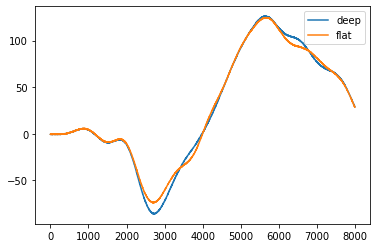

In [63]:
### plot simulations from artifical samples: L5 basket NMDA -> higher value should lead to deeper trough as reported by Jonson

plt.plot(deep_x[0], label='deep')
plt.plot(flat_x[0], label='flat')
plt.legend()

In [45]:
import functools
assert_equal = functools.partial(torch.testing.assert_close, rtol=0, atol=0)
assert_equal(flat_x, deep_x)

In [27]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [64]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(list_min + diff)
list_max = list(list_max - diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-3.2783e-01, -8.1490e-02, -6.4334e-01,  0.0000e+00, -1.3805e-03,
         2.3887e+01, -1.8690e-05, -3.6589e-03,  8.1837e-03,  3.6294e-02,
        -2.6166e-02,  5.7522e+01, -3.9101e+00, -3.1424e-01, -5.0751e-01,
        -7.3557e-02,  1.1163e+02])
tensor([4.6559e-01, 7.8276e-02, 1.9447e+00, 8.2850e-01, 1.5240e-02, 2.4419e+01,
        6.1280e-05, 5.0129e-02, 3.2911e-02, 1.6866e-01, 1.6195e-01, 6.2182e+01,
        1.0972e+01, 5.3905e+00, 1.3197e+00, 9.9066e-01, 1.4623e+02])
tensor([2.3803e-01, 4.7930e-02, 7.7642e-01, 2.4855e-01, 4.9862e-03, 1.5962e-01,
        2.3991e-05, 1.6136e-02, 7.4183e-03, 3.9710e-02, 5.6435e-02, 1.3982e+00,
        4.4647e+00, 1.7114e+00, 5.4816e-01, 3.1927e-01, 1.0382e+01])


In [70]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]

In [69]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    #upper = 'kde',
    ticks=np.round(limits,2),
    figsize=(30, 30),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
)

for i in range(5):
    axes[i][i].xaxis.label.set_color('magenta')
for i in range(5, 12):
    axes[i][i].xaxis.label.set_color('navy')
for i in range(12, 17):
    axes[i][i].xaxis.label.set_color('deeppink')

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x7faababea680> (for post_execute):


KeyboardInterrupt: 

In [71]:
posterior.set_default_x(obs_real_stat)
condition = posterior.sample((1,))

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

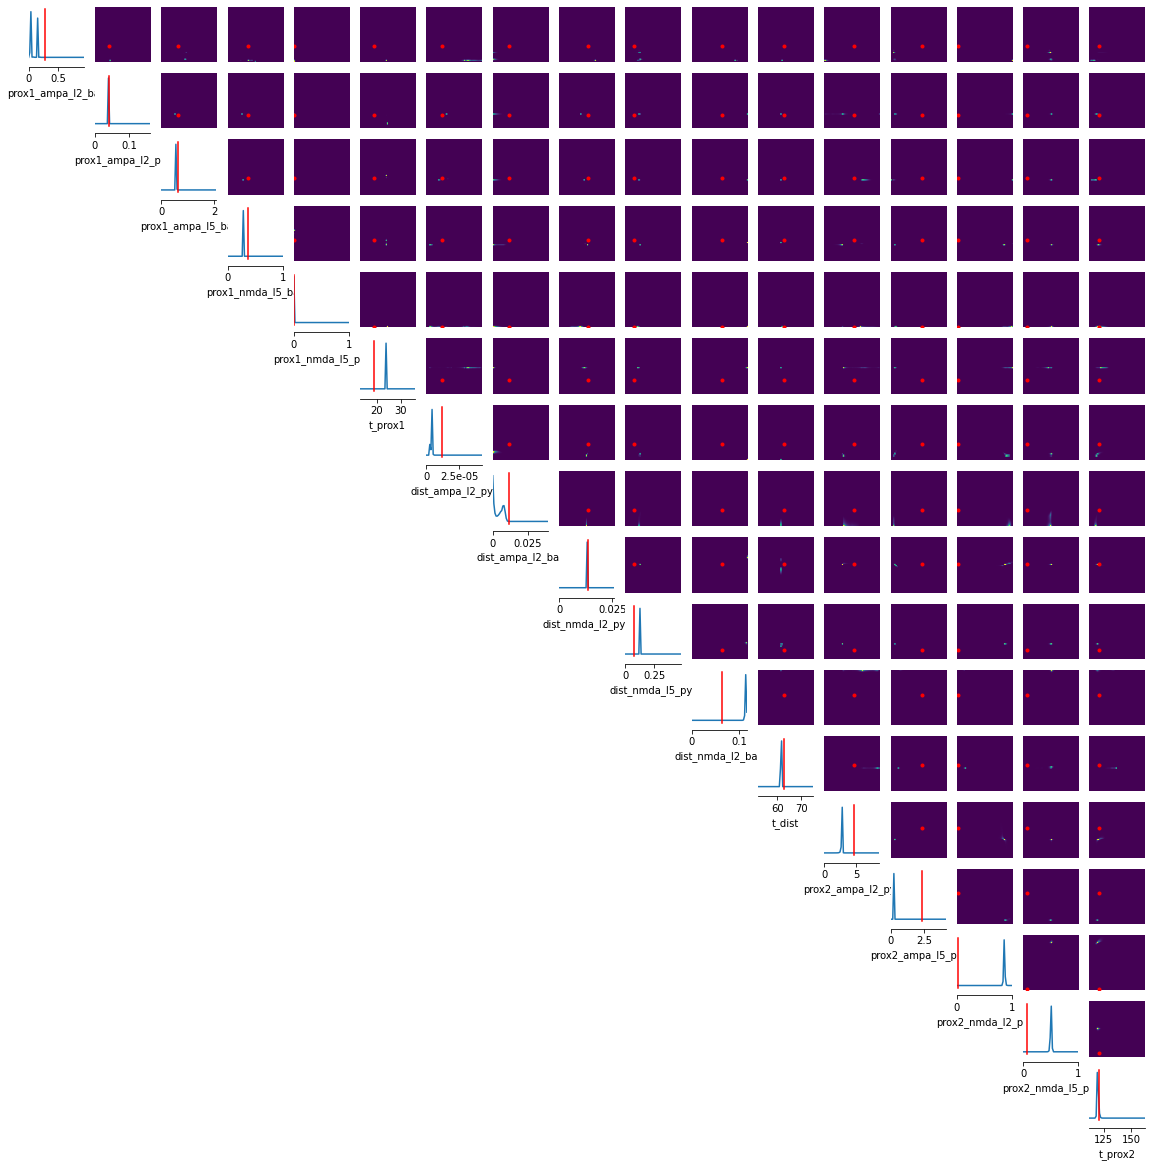

In [73]:
_ = analysis.conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
    #color_map = ['Blues', 'Reds'],
    #alpha1 = 0.8,
    #alpha2 = 0.4
 
)


In [16]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0early stop 200.0

param size early stop param size 
25 25early stop  [0.20786963403224945, 0.704474925994873, 0.006151028908789158, 0.002444138750433922, 0.09783291816711426, 0.2814788818359375, 0.04841083660721779, 0.01591433212161064, 19.422025680541992, 0.004191861022263765, 0.043937504291534424, 2.3742622943245806e-06, 0.024346452206373215, 0.8414924740791321, 0.08549538254737854, 62.50917434692383, 1.1141056347696576e-05, 0.6626543998718262, 0.03499696031212807, 0.8940036296844482, 0.0177449993789196, 0.1891465038061142, 2.547384738922119, 0.009832587093114853, 115.36315155029297]200.0200.0
early stop

 param size 200.0
param size  early stop
25param size 
  25 [0.046912793070077896, 0.57010817527771, 0.045765820890665054, 0.000160842522745952, 1.0708476305007935, 0.381526380777359, 0.04912767931818962, 0.024503152817487717, 21.3231143951416, 0.02893730252981186, 0.042845215648412704, 2.5001045287353918e-05, 0.02172866463661194, 0.44862645864486694, 0.0852429866790

[0.14684703946113586, 0.031305428594350815, 0.04047786816954613, 0.020981626585125923, 0.14371562004089355, 0.5435807108879089, 0.03522808849811554, 0.0013688182225450873, 19.42275619506836, 0.0349770113825798, 0.11594100296497345, 9.713613508210983e-06, 0.02410370483994484, 0.8326454758644104, 0.09511305391788483, 59.67060852050781, 1.3877037417842075e-05, 0.678636908531189, 7.868277549743652, 0.26873326301574707, 0.015800783410668373, 0.07013186067342758, 0.736738383769989, 0.1276528388261795, 119.46664428710938]
set network params: [0.14684703946113586, 0.031305428594350815, 0.04047786816954613, 0.020981626585125923, 0.14371562004089355, 0.5435807108879089, 0.03522808849811554, 0.0013688182225450873, 19.42275619506836, 0.0349770113825798, 0.11594100296497345, 9.713613508210983e-06, 0.02410370483994484, 0.8326454758644104, 0.09511305391788483, 59.67060852050781, 1.3877037417842075e-05, 0.678636908531189, 7.868277549743652, 0.26873326301574707, 0.015800783410668373, 0.0701318606734275

early stop 200.0
param size  25
[0.15963123738765717, 0.056038275361061096, 0.01194050069898367, 0.0014344272203743458, 0.12302658706903458, 0.12662915885448456, 0.03692182898521423, 0.04807283356785774, 22.998157501220703, 0.027097277343273163, 0.05441296100616455, 1.0412691153760534e-05, 0.023851217702031136, 0.790012776851654, 0.09970863163471222, 61.15416717529297, 5.540218808164354e-06, 0.26335716247558594, 2.8202407360076904, 0.08989576250314713, 0.023572372272610664, 0.7272294759750366, 2.2934932708740234, 0.08104561269283295, 115.9560775756836]
set network params: [0.15963123738765717, 0.056038275361061096, 0.01194050069898367, 0.0014344272203743458, 0.12302658706903458, 0.12662915885448456, 0.03692182898521423, 0.04807283356785774, 22.998157501220703, 0.027097277343273163, 0.05441296100616455, 1.0412691153760534e-05, 0.023851217702031136, 0.790012776851654, 0.09970863163471222, 61.15416717529297, 5.540218808164354e-06, 0.26335716247558594, 2.8202407360076904, 0.089895762503147

set network params: [0.23062726855278015, 0.06635330617427826, 0.008117146790027618, 0.000958975579123944, 0.1452254354953766, 0.28361576795578003, 0.04952748864889145, 0.003170004114508629, 23.729021072387695, 0.03795503452420235, 0.10261986404657364, 1.268334744963795e-05, 0.025399090722203255, 0.5563300848007202, 0.06107012927532196, 62.803775787353516, 1.1987400284851901e-05, 0.5819910168647766, 1.382827639579773, 0.06730414181947708, 0.03509518504142761, 0.8082839846611023, 0.819366455078125, 0.30351269245147705, 113.59569549560547]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  20 tasks      | elapsed:  4.9min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0

set network params: [0.14664719998836517, 0.3246369957923889, 0.029739616438746452, 0.0007209135801531374, 0.5310750007629395, 0.35498136281967163, 0.04915817081928253, 0.012380678206682205, 20.138103485107422, 0.022426338866353035, 0.06390358507633209, 2.5350098439957947e-05, 0.025544438511133194, 0.7473194599151611, 0.10177779197692871, 60.596927642822266, 4.876482307736296e-06, 0.6813173294067383, 5.63855504989624, 0.9471564292907715, 0.007456016261130571, 0.23298139870166779, 0.1755775809288025, 0.24058496952056885, 118.98797607421875]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  29 tasks      | elapsed:  6.7min
Simulation time: 10.0 ms...
early stop 200.0
param size  25
[0.13817673921585083, 0.055468712002038956, 0.011657541617751122, 0.025004345923662186, 0.13479042053222656, 0.36652466654777527, 0.01985655166208744, 0.005634342320263386, 19.469966888427734, 0.03126576915383339, 0.06437914818525314, 3.3562889711902244e-07, 0.02177177183330059, 0.7256879806518555, 0.102

Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 110.0 ms...
early stop 200.0
param size  25
[0.013845391571521759, 0.2981692850589752, 0.004896174650639296, 0.010218126699328423, 0.21973294019699097, 0.22121237218379974, 0.0473453551530838, 0.024106254801154137, 19.722856521606445, 0.03651095926761627, 0.09148795157670975, 2.222616421931889e-05, 0.025006718933582306, 0.52350914478302, 0.09463663399219513, 61.35430145263672, 4.1092466744885314e-06, 0.6056410074234009, 7.335049152374268, 0.49540621042251587, 0.05159371346235275, 0.9065859317779541, 1.9566011428833008, 0.05110856145620346, 116.03944396972656]
set network params: [0.013845391571521

set network params: [0.21223798394203186, 0.18566685914993286, 0.012659002095460892, 0.010334080085158348, 1.1151291131973267, 0.29451146721839905, 0.04817230626940727, 0.04579620808362961, 19.099201202392578, 0.017115680500864983, 0.037207067012786865, 2.441316428303253e-05, 0.019946232438087463, 0.708415150642395, 0.16364966332912445, 57.7992057800293, 3.1566271445626626e-06, 0.9460107684135437, 1.7707313299179077, 0.1543320119380951, 0.04279937967658043, 0.3739761710166931, 1.810668706893921, 0.15637722611427307, 115.5985107421875]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed: 10.3min
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
early stop 200.0
param size  25
[0.05518374219536781, 0.06693470478057861, 0.01087118498980999, 0.03455023840069771, 0.18213990330696106, 0.230080

set network params: [0.2732522189617157, 0.8618137240409851, 0.02384968288242817, 0.00016256740491371602, 0.1990671157836914, 0.4284141957759857, 0.04653310403227806, 0.013987382873892784, 20.503406524658203, 0.03366352990269661, 0.08936923742294312, 3.884902616846375e-05, 0.024695707485079765, 0.41029489040374756, 0.08508262783288956, 62.304988861083984, 1.674019767960999e-05, 0.6798850893974304, 1.236190915107727, 0.19948826730251312, 0.020997429266572, 0.6239850521087646, 0.07469117641448975, 0.3994465470314026, 120.02737426757812]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 12.1min
Building the NEURON model
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
[Done]
r

running trial 1 on 1 cores[Done]

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
early stop 200.0
param size  25
[0.05092544108629227, 0.25246843695640564, 0.002205731812864542, 0.021429283544421196, 0.10829168558120728, 0.21004189550876617, 0.03657786548137665, 0.002889461349695921, 19.373350143432617, 0.0232273917645216, 0.010725497268140316, 9.233383025275543e-06, 0.02408384159207344, 0.6509379744529724, 0.10075897723436356, 59.793453216552734, 5.295579285302665e-06, 0.4902132451534271, 4.628083229064941, 0.2821331322193146, 0.05293751135468483, 0.8095841407775879, 0.8610458374023438, 0.08910655975341797, 116.89762878417969]
set network params: [0.05092544108629227, 0.25246843695640564, 0.002205731812864542, 0.02142928354442

Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
[Done]
Simulation time: 140.0 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms..

Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
early stop 200.0
param size  25
[0.033096011728048325, 0.04131072387099266, 0.00978629756718874, 0.0042244913056492805, 0.19393832981586456, 0.024117806926369667, 0.044758141040802, 0.03446696698665619, 20.191526412963867, 0.013125160709023476, 0.11626934260129929, 1.5299696315196343e-05, 0.02552780695259571, 0.48211124539375305, 0.11605150997638702, 59.15445327758789, 6.711217110932921e-07, 0.7476134896278381, 3.8815155029296875, 0.6605045199394226, 0.039802730083465576, 0.06741024553775787, 1.52381432056427, 0.0752330794930458, 115.75659942626953]
set network params: [0.033096011728048325, 0.04131072387099266, 0.00978629756718874, 0.0042244913056492805, 0.19393832981586456, 0.024117806926369667, 0.044758141040802, 0.03446696698665619, 20.191526412963867, 0.013125160709023476, 0.11626934260129929, 1.5299696315196343

[0.030116451904177666, 0.04214048385620117, 0.012490527704358101, 0.006640058476477861, 0.16154205799102783, 0.24619095027446747, 0.03529790788888931, 0.0031101854983717203, 19.346765518188477, 0.01096885185688734, 0.11690083146095276, 1.7736676454660483e-05, 0.02542157471179962, 0.2679497003555298, 0.09489700943231583, 59.527591705322266, 1.3846402907802258e-05, 0.4648664891719818, 8.140257835388184, 0.03488561883568764, 0.04269231855869293, 0.8352982401847839, 1.8713808059692383, 0.10084319114685059, 112.6281967163086]
set network params: [0.030116451904177666, 0.04214048385620117, 0.012490527704358101, 0.006640058476477861, 0.16154205799102783, 0.24619095027446747, 0.03529790788888931, 0.0031101854983717203, 19.346765518188477, 0.01096885185688734, 0.11690083146095276, 1.7736676454660483e-05, 0.02542157471179962, 0.2679497003555298, 0.09489700943231583, 59.527591705322266, 1.3846402907802258e-05, 0.4648664891719818, 8.140257835388184, 0.03488561883568764, 0.04269231855869293, 0.8352

In [ ]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [ ]:
samples_prior[:][0].shape

In [ ]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

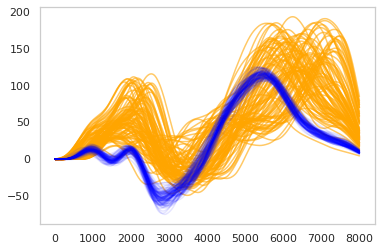

In [47]:
for i in range(100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
for i in range(100):
    plt.plot(s_x[i], color='blue', alpha=0.1)

In [22]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



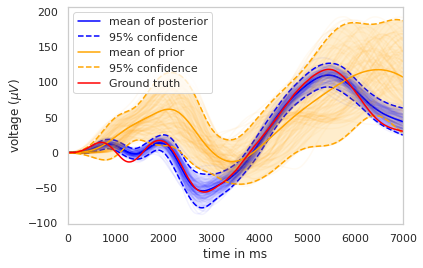

In [23]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()

## Correlation matrices

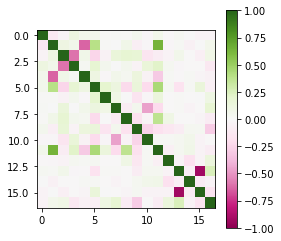

In [75]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

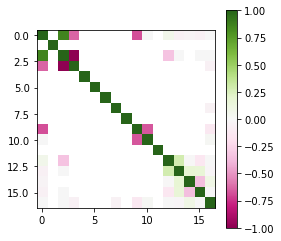

In [81]:
condition = posterior.sample((1,))

cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*17),
)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

## Evaluation of features

In [82]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [83]:
t = obs_real_stat

t

tensor([[ 6.9800e+02,  2.6790e+03,  5.5510e+03,  5.0662e+00, -9.2767e+01,
          1.1571e+02,  3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,
          4.9754e+03,  6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01,
         -1.5394e+01, -3.4815e+01, -6.5808e+01,  3.7142e+01]],
       dtype=torch.float64)

In [84]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 6.9800e+02,  5.5510e+03,  5.0662e+00, -9.2767e+01,  1.1571e+02,
          3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,  4.9754e+03,
          6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01, -1.5394e+01,
         -3.4815e+01, -6.5808e+01,  3.7142e+01]], dtype=torch.float64)


torch.Size([1, 18])

In [85]:
posterior.set_default_x(obs_real_stat)

In [86]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [89]:

for i in range(19):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [14]:
sum_stats_names =                                [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'mean1000',
                    'mean1500',
                    'mean1700',
                    'mean1900',
                    'mean2100',
                    'mean2300',
                    'mean4000',
                ]

sample_list = []
for i in range(len(sum_stats_names)):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

KeyError: 'samples_0'

In [90]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(19):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

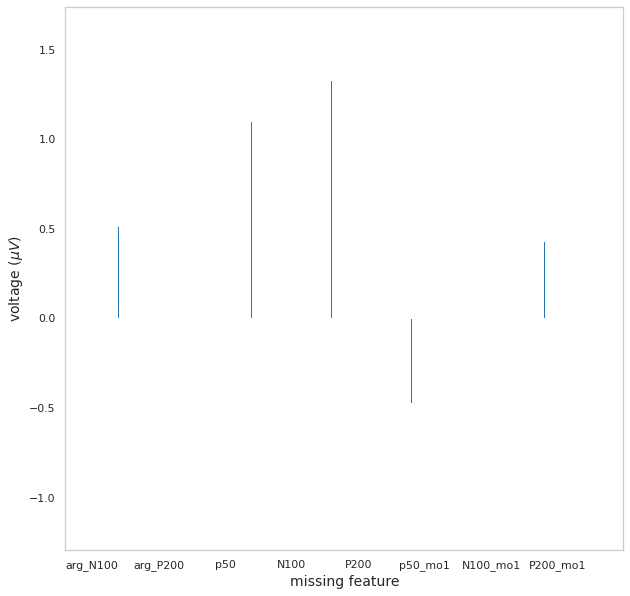

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


In [9]:
#s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior)
#s_x_stat = calculate_summary_stats_temporal(s_x)
posterior.set_default_x(obs_real_stat)
    
s_x_prior_stat = prior.sample((1000,))

s_x_stat = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
s_x_prior_stat.shape

torch.Size([1000, 17])

In [11]:
obs_real_stat[0][1]

tensor(2702.)

In [ ]:
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(10,100), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(6):
    
    print(i)

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(s_x_prior_stat.shape[0]):
        globals()['sum_stats%s' % i].append(s_x_stat[j][i])
        globals()['x%s' % i].append(s_x_prior_stat[j][i])

    sum_stat = globals()['sum_stats%s' % i]
    

    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max(sum_stat)-min(sum_stat))*0.03 + 0.001
    
   
    binrange = np.arange(min(sum_stat), max(sum_stat) + binsteps, binsteps)
    
   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins = binrange,  facecolor='g', alpha=0.75, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins = binrange,   facecolor='b', alpha=0.5, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(obs_real_stat[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')

0
[tensor(0.0861), tensor(0.0260), tensor(0.0270), tensor(0.0270), tensor(0.0279), tensor(0.0306), tensor(0.0248), tensor(0.0267), tensor(0.0302), tensor(0.0272), tensor(0.0278), tensor(0.0268), tensor(0.0279), tensor(0.0304), tensor(0.0274), tensor(0.0255), tensor(0.0245), tensor(0.0265), tensor(0.0283), tensor(0.0266), tensor(0.0289), tensor(0.0274), tensor(0.0279), tensor(0.0284), tensor(0.0276), tensor(0.0295), tensor(0.0303), tensor(0.0267), tensor(0.0266), tensor(0.0276), tensor(0.0279), tensor(0.0268), tensor(0.0278), tensor(0.0267), tensor(0.0278), tensor(0.0272), tensor(0.0273), tensor(0.0249), tensor(0.0253), tensor(0.0267), tensor(0.0267), tensor(0.0257), tensor(0.0283), tensor(0.0268), tensor(0.0276), tensor(0.0311), tensor(0.0278), tensor(0.0286), tensor(0.0288), tensor(0.0245), tensor(0.0275), tensor(0.0275), tensor(0.0273), tensor(0.0270), tensor(0.0275), tensor(0.0288), tensor(0.0269), tensor(0.0283), tensor(0.0237), tensor(0.0295), tensor(0.0317), tensor(0.0256), tenso

1
[tensor(0.0114), tensor(0.0454), tensor(0.0396), tensor(0.0389), tensor(0.0389), tensor(0.0397), tensor(0.0448), tensor(0.0449), tensor(0.0417), tensor(0.0400), tensor(0.0397), tensor(0.0395), tensor(0.0390), tensor(0.0404), tensor(0.0396), tensor(0.0389), tensor(0.0456), tensor(0.0390), tensor(0.0450), tensor(0.0406), tensor(0.0457), tensor(0.0391), tensor(0.0393), tensor(0.0396), tensor(0.0453), tensor(0.0394), tensor(0.0398), tensor(0.0393), tensor(0.0392), tensor(0.0395), tensor(0.0390), tensor(0.0396), tensor(0.0405), tensor(0.0452), tensor(0.0452), tensor(0.0457), tensor(0.0396), tensor(0.0390), tensor(0.0454), tensor(0.0389), tensor(0.0451), tensor(0.0450), tensor(0.0393), tensor(0.0393), tensor(0.0406), tensor(0.0454), tensor(0.0392), tensor(0.0393), tensor(0.0451), tensor(0.0392), tensor(0.0393), tensor(0.0389), tensor(0.0452), tensor(0.0454), tensor(0.0395), tensor(0.0393), tensor(0.0389), tensor(0.0398), tensor(0.0452), tensor(0.0399), tensor(0.0395), tensor(0.0453), tenso

2
[tensor(0.6156), tensor(0.6397), tensor(0.5287), tensor(0.5281), tensor(0.5172), tensor(0.7045), tensor(0.5526), tensor(0.5811), tensor(0.4743), tensor(0.5263), tensor(0.5409), tensor(0.5578), tensor(0.5914), tensor(0.4473), tensor(0.5757), tensor(0.5765), tensor(0.6272), tensor(0.5465), tensor(0.5899), tensor(0.5397), tensor(0.5810), tensor(0.6487), tensor(0.5599), tensor(0.5188), tensor(0.6413), tensor(0.5649), tensor(0.5164), tensor(0.5591), tensor(0.5772), tensor(0.6134), tensor(0.6278), tensor(0.5979), tensor(0.5774), tensor(0.6907), tensor(0.7221), tensor(0.5708), tensor(0.5442), tensor(0.6725), tensor(0.6491), tensor(0.5349), tensor(0.6633), tensor(0.5429), tensor(0.5765), tensor(0.6327), tensor(0.5460), tensor(0.6321), tensor(0.5750), tensor(0.5862), tensor(0.5791), tensor(0.6021), tensor(0.5248), tensor(0.5283), tensor(0.6624), tensor(0.5678), tensor(0.6145), tensor(0.5536), tensor(0.5489), tensor(0.6195), tensor(0.6797), tensor(0.5366), tensor(0.4698), tensor(0.6308), tenso

3
[tensor(0.4606), tensor(0.2806), tensor(0.2432), tensor(0.2770), tensor(0.3169), tensor(0.2795), tensor(0.2785), tensor(0.3475), tensor(0.4965), tensor(0.2925), tensor(0.2951), tensor(0.2846), tensor(0.2823), tensor(0.5048), tensor(0.2112), tensor(0.2651), tensor(0.2937), tensor(0.2669), tensor(0.4510), tensor(0.2833), tensor(0.5166), tensor(0.2400), tensor(0.2787), tensor(0.3686), tensor(0.2802), tensor(0.2427), tensor(0.5200), tensor(0.2720), tensor(0.2331), tensor(0.2424), tensor(0.2940), tensor(0.2658), tensor(0.2743), tensor(0.2739), tensor(0.2798), tensor(0.3874), tensor(0.2909), tensor(0.0892), tensor(0.2855), tensor(0.2732), tensor(0.3362), tensor(0.3500), tensor(0.3650), tensor(0.2726), tensor(0.2739), tensor(0.5148), tensor(0.2876), tensor(0.4876), tensor(0.4425), tensor(0.2801), tensor(0.2739), tensor(0.2931), tensor(0.2914), tensor(0.2903), tensor(0.2810), tensor(0.2760), tensor(0.2347), tensor(0.2739), tensor(0.2098), tensor(0.5208), tensor(0.6337), tensor(0.2935), tenso

4
[tensor(0.0126), tensor(0.0019), tensor(0.0022), tensor(0.0022), tensor(0.0022), tensor(0.0023), tensor(0.0018), tensor(0.0019), tensor(0.0022), tensor(0.0022), tensor(0.0022), tensor(0.0022), tensor(0.0023), tensor(0.0022), tensor(0.0022), tensor(0.0023), tensor(0.0019), tensor(0.0022), tensor(0.0020), tensor(0.0022), tensor(0.0020), tensor(0.0022), tensor(0.0023), tensor(0.0022), tensor(0.0019), tensor(0.0022), tensor(0.0023), tensor(0.0022), tensor(0.0023), tensor(0.0023), tensor(0.0023), tensor(0.0022), tensor(0.0022), tensor(0.0020), tensor(0.0020), tensor(0.0018), tensor(0.0023), tensor(0.0022), tensor(0.0019), tensor(0.0022), tensor(0.0020), tensor(0.0019), tensor(0.0022), tensor(0.0023), tensor(0.0022), tensor(0.0020), tensor(0.0023), tensor(0.0023), tensor(0.0019), tensor(0.0023), tensor(0.0022), tensor(0.0022), tensor(0.0019), tensor(0.0017), tensor(0.0023), tensor(0.0022), tensor(0.0022), tensor(0.0023), tensor(0.0019), tensor(0.0023), tensor(0.0023), tensor(0.0019), tenso

5
[tensor(24.3764), tensor(24.2460), tensor(24.1984), tensor(24.1759), tensor(24.1971), tensor(24.2077), tensor(24.2472), tensor(24.2513), tensor(24.2411), tensor(24.2089), tensor(24.2098), tensor(24.1957), tensor(24.1950), tensor(24.2157), tensor(24.1990), tensor(24.1869), tensor(24.2465), tensor(24.1876), tensor(24.2581), tensor(24.2230), tensor(24.2558), tensor(24.1618), tensor(24.1872), tensor(24.1918), tensor(24.2564), tensor(24.1971), tensor(24.1866), tensor(24.1943), tensor(24.1896), tensor(24.1999), tensor(24.1943), tensor(24.1871), tensor(24.2118), tensor(24.2645), tensor(24.2589), tensor(24.2482), tensor(24.1929), tensor(24.1983), tensor(24.2387), tensor(24.1847), tensor(24.2482), tensor(24.2477), tensor(24.1819), tensor(24.1837), tensor(24.2118), tensor(24.2684), tensor(24.1819), tensor(24.1609), tensor(24.2520), tensor(24.1825), tensor(24.2090), tensor(24.1895), tensor(24.2418), tensor(24.2577), tensor(24.1843), tensor(24.1905), tensor(24.1879), tensor(24.1958), tensor(24.2

6
[tensor(3.5117e-05), tensor(5.6834e-06), tensor(3.3606e-05), tensor(2.8948e-06), tensor(2.8783e-05), tensor(3.3432e-05), tensor(4.0426e-05), tensor(3.6525e-05), tensor(3.3671e-05), tensor(3.0794e-05), tensor(4.0502e-05), tensor(3.2609e-05), tensor(2.8790e-05), tensor(3.2768e-05), tensor(1.8890e-05), tensor(2.4641e-05), tensor(3.6570e-06), tensor(7.3801e-06), tensor(3.8499e-05), tensor(3.6522e-05), tensor(1.7465e-05), tensor(3.4016e-05), tensor(3.4343e-05), tensor(2.8776e-05), tensor(3.5140e-05), tensor(3.3471e-05), tensor(1.0524e-05), tensor(3.3425e-05), tensor(2.0793e-06), tensor(3.3224e-05), tensor(2.4449e-05), tensor(2.9116e-05), tensor(4.0673e-05), tensor(3.0965e-05), tensor(3.1944e-05), tensor(3.4360e-05), tensor(1.3223e-05), tensor(3.1221e-05), tensor(2.7519e-06), tensor(3.0265e-05), tensor(3.4525e-05), tensor(2.9956e-05), tensor(9.9546e-06), tensor(1.2251e-05), tensor(2.4024e-06), tensor(3.0984e-05), tensor(3.4192e-05), tensor(2.9350e-05), tensor(3.6793e-05), tensor(3.2666e-05

7
[tensor(0.0210), tensor(-0.0007), tensor(-0.0006), tensor(0.0007), tensor(-0.0016), tensor(0.0391), tensor(-0.0012), tensor(-0.0011), tensor(-0.0008), tensor(-0.0005), tensor(0.0034), tensor(0.0003), tensor(0.0307), tensor(-0.0006), tensor(-0.0008), tensor(-0.0010), tensor(-0.0001), tensor(-0.0014), tensor(-0.0007), tensor(4.3664e-05), tensor(-0.0009), tensor(-0.0012), tensor(-0.0013), tensor(-1.0791e-06), tensor(-0.0009), tensor(-0.0013), tensor(0.0316), tensor(-0.0011), tensor(-0.0014), tensor(0.0342), tensor(-0.0016), tensor(-0.0004), tensor(0.0374), tensor(0.0383), tensor(-0.0013), tensor(-0.0015), tensor(0.0009), tensor(0.0037), tensor(-0.0011), tensor(-0.0009), tensor(-0.0011), tensor(-0.0011), tensor(-0.0016), tensor(0.0391), tensor(0.0053), tensor(0.0298), tensor(0.0225), tensor(-0.0015), tensor(-0.0020), tensor(0.0295), tensor(-0.0013), tensor(-0.0013), tensor(0.0040), tensor(0.0387), tensor(-0.0008), tensor(-0.0019), tensor(0.0018), tensor(0.0183), tensor(-0.0016), tensor(0

8
[tensor(0.0168), tensor(0.0193), tensor(0.0174), tensor(0.0131), tensor(0.0125), tensor(0.0136), tensor(0.0136), tensor(0.0148), tensor(0.0185), tensor(0.0130), tensor(0.0142), tensor(0.0130), tensor(0.0124), tensor(0.0174), tensor(0.0175), tensor(0.0135), tensor(0.0187), tensor(0.0136), tensor(0.0241), tensor(0.0129), tensor(0.0241), tensor(0.0212), tensor(0.0181), tensor(0.0186), tensor(0.0187), tensor(0.0153), tensor(0.0238), tensor(0.0181), tensor(0.0135), tensor(0.0127), tensor(0.0138), tensor(0.0207), tensor(0.0192), tensor(0.0199), tensor(0.0189), tensor(0.0129), tensor(0.0179), tensor(0.0130), tensor(0.0188), tensor(0.0191), tensor(0.0125), tensor(0.0128), tensor(0.0140), tensor(0.0121), tensor(0.0132), tensor(0.0190), tensor(0.0124), tensor(0.0195), tensor(0.0169), tensor(0.0121), tensor(0.0133), tensor(0.0127), tensor(0.0134), tensor(0.0174), tensor(0.0198), tensor(0.0117), tensor(0.0176), tensor(0.0189), tensor(0.0186), tensor(0.0246), tensor(0.0125), tensor(0.0172), tenso

9
[tensor(0.1360), tensor(0.1051), tensor(0.1293), tensor(0.1073), tensor(0.1225), tensor(0.1112), tensor(0.1141), tensor(0.1230), tensor(0.1131), tensor(0.1296), tensor(0.1239), tensor(0.1242), tensor(0.1273), tensor(0.1085), tensor(0.1184), tensor(0.1377), tensor(0.1162), tensor(0.1354), tensor(0.1060), tensor(0.1133), tensor(0.1098), tensor(0.0936), tensor(0.1384), tensor(0.0994), tensor(0.1189), tensor(0.1285), tensor(0.1084), tensor(0.1283), tensor(0.1389), tensor(0.1318), tensor(0.1369), tensor(0.1214), tensor(0.1193), tensor(0.1085), tensor(0.1289), tensor(0.1191), tensor(0.1322), tensor(0.1340), tensor(0.1226), tensor(0.1205), tensor(0.1295), tensor(0.1204), tensor(0.1178), tensor(0.1300), tensor(0.1192), tensor(0.1265), tensor(0.1259), tensor(0.1036), tensor(0.1042), tensor(0.1258), tensor(0.1348), tensor(0.1124), tensor(0.1016), tensor(0.0902), tensor(0.1313), tensor(0.1305), tensor(0.1256), tensor(0.1294), tensor(0.1103), tensor(0.1080), tensor(0.1340), tensor(0.1267), tenso

10
[tensor(0.1161), tensor(0.1155), tensor(0.1207), tensor(0.1156), tensor(0.1152), tensor(0.1190), tensor(0.1165), tensor(0.1161), tensor(0.1186), tensor(0.1180), tensor(0.1296), tensor(0.1233), tensor(0.1174), tensor(0.1326), tensor(0.1300), tensor(0.1305), tensor(0.1168), tensor(0.1299), tensor(0.1172), tensor(0.1300), tensor(0.1166), tensor(0.1305), tensor(0.1156), tensor(0.1329), tensor(0.1331), tensor(0.1234), tensor(0.1142), tensor(0.1160), tensor(0.1295), tensor(0.1149), tensor(0.1224), tensor(0.1160), tensor(0.1165), tensor(0.1173), tensor(0.1176), tensor(0.1254), tensor(0.1201), tensor(0.1149), tensor(0.1331), tensor(0.1157), tensor(0.1148), tensor(0.1154), tensor(0.1196), tensor(0.1168), tensor(0.1198), tensor(0.1148), tensor(0.1211), tensor(0.1342), tensor(0.1160), tensor(0.1192), tensor(0.1241), tensor(0.1243), tensor(0.1325), tensor(0.1143), tensor(0.1154), tensor(0.1264), tensor(0.1194), tensor(0.1161), tensor(0.1191), tensor(0.1214), tensor(0.1188), tensor(0.1159), tens

11
[tensor(61.2986), tensor(61.9055), tensor(61.6964), tensor(61.5303), tensor(61.5689), tensor(61.4384), tensor(61.9701), tensor(61.9750), tensor(61.7479), tensor(61.5975), tensor(61.5356), tensor(61.5177), tensor(61.4664), tensor(61.6179), tensor(61.7107), tensor(61.4740), tensor(61.9354), tensor(61.4896), tensor(62.0691), tensor(61.6604), tensor(62.0360), tensor(61.5402), tensor(61.6320), tensor(61.5922), tensor(61.9699), tensor(61.6422), tensor(61.6581), tensor(61.6777), tensor(61.4835), tensor(61.4950), tensor(61.4725), tensor(61.5461), tensor(61.6643), tensor(61.8482), tensor(61.9380), tensor(61.9732), tensor(61.5879), tensor(61.6260), tensor(61.9128), tensor(61.5742), tensor(61.9615), tensor(61.9770), tensor(61.5023), tensor(61.4235), tensor(61.5893), tensor(61.9247), tensor(61.5112), tensor(61.6009), tensor(62.0442), tensor(61.4718), tensor(61.5094), tensor(61.5361), tensor(61.9266), tensor(61.9913), tensor(61.5694), tensor(61.5361), tensor(61.6831), tensor(61.5735), tensor(62.

12
[tensor(6.5386), tensor(8.3645), tensor(0.7617), tensor(3.0010), tensor(7.8573), tensor(6.4485), tensor(6.9629), tensor(6.9855), tensor(6.2889), tensor(3.1629), tensor(7.5600), tensor(6.4299), tensor(5.8599), tensor(6.8723), tensor(6.4998), tensor(6.7898), tensor(6.9497), tensor(6.2358), tensor(4.3618), tensor(8.1217), tensor(3.4009), tensor(6.4031), tensor(2.9681), tensor(6.0561), tensor(6.4496), tensor(6.2606), tensor(3.6833), tensor(7.9770), tensor(5.7555), tensor(2.9241), tensor(8.6225), tensor(6.3237), tensor(6.2065), tensor(7.9664), tensor(7.9214), tensor(6.2646), tensor(6.3755), tensor(7.6333), tensor(4.1315), tensor(6.2071), tensor(5.1488), tensor(6.5625), tensor(6.2065), tensor(8.5828), tensor(6.2178), tensor(5.9377), tensor(6.3459), tensor(8.5251), tensor(6.3089), tensor(6.0942), tensor(2.9002), tensor(6.9800), tensor(6.4570), tensor(3.1312), tensor(2.9388), tensor(3.0733), tensor(3.0978), tensor(8.0561), tensor(3.0914), tensor(0.5777), tensor(5.8427), tensor(6.9824), tens

13
[tensor(0.0963), tensor(2.3487), tensor(0.1605), tensor(2.4658), tensor(2.0984), tensor(1.4730), tensor(0.1509), tensor(0.4113), tensor(0.2045), tensor(1.6288), tensor(0.2098), tensor(0.2515), tensor(1.3108), tensor(1.5834), tensor(0.2642), tensor(0.1697), tensor(0.2957), tensor(0.2403), tensor(2.1026), tensor(0.2142), tensor(1.4365), tensor(1.9207), tensor(1.9184), tensor(0.1959), tensor(3.7369), tensor(4.1225), tensor(2.4312), tensor(0.1789), tensor(0.2589), tensor(2.0628), tensor(0.2133), tensor(0.2195), tensor(1.6597), tensor(0.1721), tensor(3.5479), tensor(0.1968), tensor(0.2187), tensor(0.1474), tensor(0.1612), tensor(1.2405), tensor(2.4364), tensor(0.1758), tensor(0.2363), tensor(1.7567), tensor(1.3495), tensor(3.6710), tensor(4.0894), tensor(3.4660), tensor(0.1548), tensor(0.1904), tensor(0.1699), tensor(1.9230), tensor(2.3357), tensor(2.2787), tensor(0.5157), tensor(2.4725), tensor(0.1880), tensor(1.0278), tensor(0.6326), tensor(1.3843), tensor(1.1996), tensor(1.4993), tens

14
[tensor(1.0205), tensor(0.1570), tensor(0.1435), tensor(0.9852), tensor(0.8823), tensor(0.1628), tensor(0.9282), tensor(0.9247), tensor(0.9075), tensor(0.3926), tensor(0.1803), tensor(0.1725), tensor(1.0088), tensor(0.1738), tensor(0.1826), tensor(0.8547), tensor(0.5306), tensor(0.8553), tensor(0.9655), tensor(0.4381), tensor(0.8625), tensor(0.5087), tensor(0.4642), tensor(0.3877), tensor(0.2794), tensor(0.4887), tensor(0.9706), tensor(0.8361), tensor(0.8446), tensor(0.5338), tensor(0.7933), tensor(0.1365), tensor(0.8493), tensor(0.1425), tensor(0.1330), tensor(0.1610), tensor(0.1385), tensor(1.0117), tensor(0.8920), tensor(0.9675), tensor(0.9747), tensor(0.9227), tensor(0.1544), tensor(0.2976), tensor(0.5032), tensor(0.6422), tensor(0.0991), tensor(0.5676), tensor(0.8278), tensor(0.3164), tensor(0.8481), tensor(0.8951), tensor(0.7480), tensor(0.9856), tensor(0.8161), tensor(0.4966), tensor(0.9910), tensor(0.3710), tensor(0.3290), tensor(0.2558), tensor(0.4870), tensor(0.1605), tens